In [65]:
import pandas as pd

# Load dataset
df = pd.read_csv("titanic.csv")

# Display first few rows of the dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [67]:
#checking the null values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [68]:
#As Age,fare and cabin have null values we are handling
# imputing the null values using mean for age and fare
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
# imputing the null values using mean for Cabin
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

In [69]:
#confirming no null values in the dataset
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [70]:
#Checking for the outliers in the dataset
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numerical columns (Age, Fare)
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for 'Age' and 'Fare'
outliers_iqr = (df[['Age', 'Fare']] < lower_bound) | (df[['Age', 'Fare']] > upper_bound)

# Print the number of outliers detected for Age and Fare
print("Number of outliers in 'Age':", outliers_iqr['Age'].sum())
print("Number of outliers in 'Fare':", outliers_iqr['Fare'].sum())

# Optionally, display rows with outliers
outlier_rows_iqr = df[outliers_iqr.any(axis=1)]
print("Outlier rows:\n", outlier_rows_iqr)


Number of outliers in 'Age': 36
Number of outliers in 'Fare': 55
Outlier rows:
      PassengerId  Survived  Pclass  \
2            894         0       2   
12           904         1       1   
13           905         0       2   
20           912         0       1   
24           916         1       1   
..           ...       ...     ...   
400         1292         1       1   
407         1299         0       1   
409         1301         1       3   
411         1303         1       1   
414         1306         1       1   

                                                Name     Sex   Age  SibSp  \
2                          Myles, Mr. Thomas Francis    male  62.0      0   
12     Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female  23.0      1   
13                              Howard, Mr. Benjamin    male  63.0      1   
20                            Rothschild, Mr. Martin    male  55.0      1   
24   Ryerson, Mrs. Arthur Larned (Emily Maria Borie)  female  48.0      1   
.

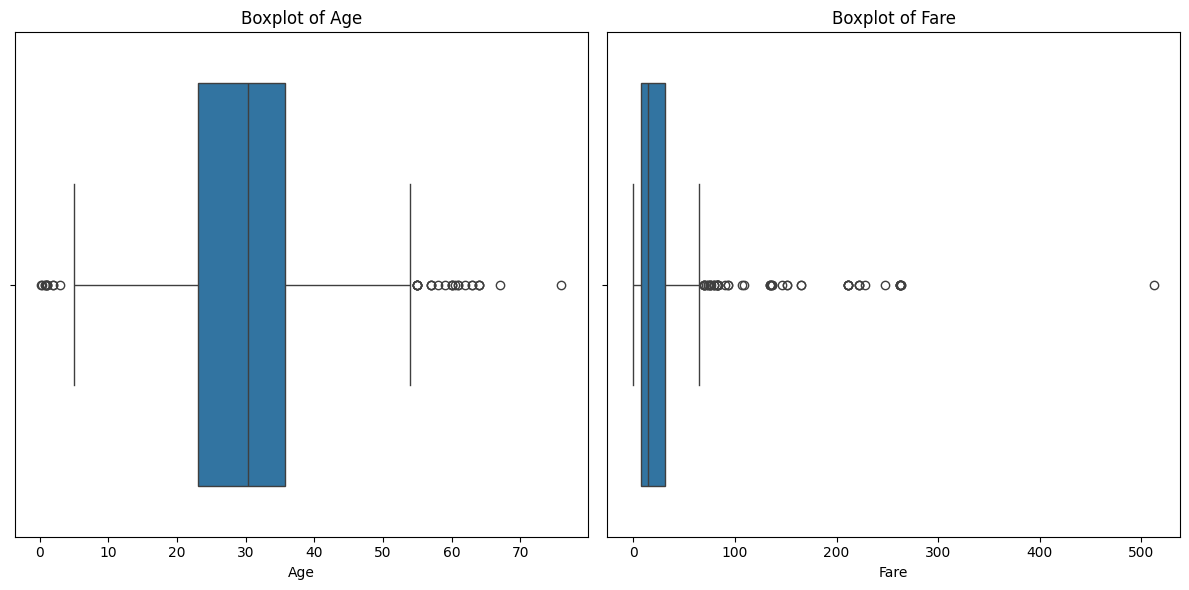

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots to visually check for outliers in 'Age' and 'Fare'
plt.figure(figsize=(12, 6))

# Age Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

# Fare Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()


In [72]:
# Remove rows where outliers are detected
df_no_outliers = df[~((df[['Age', 'Fare']] < lower_bound) | (df[['Age', 'Fare']] > upper_bound)).any(axis=1)]

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)


Original DataFrame shape: (418, 12)
DataFrame shape after removing outliers: (340, 12)


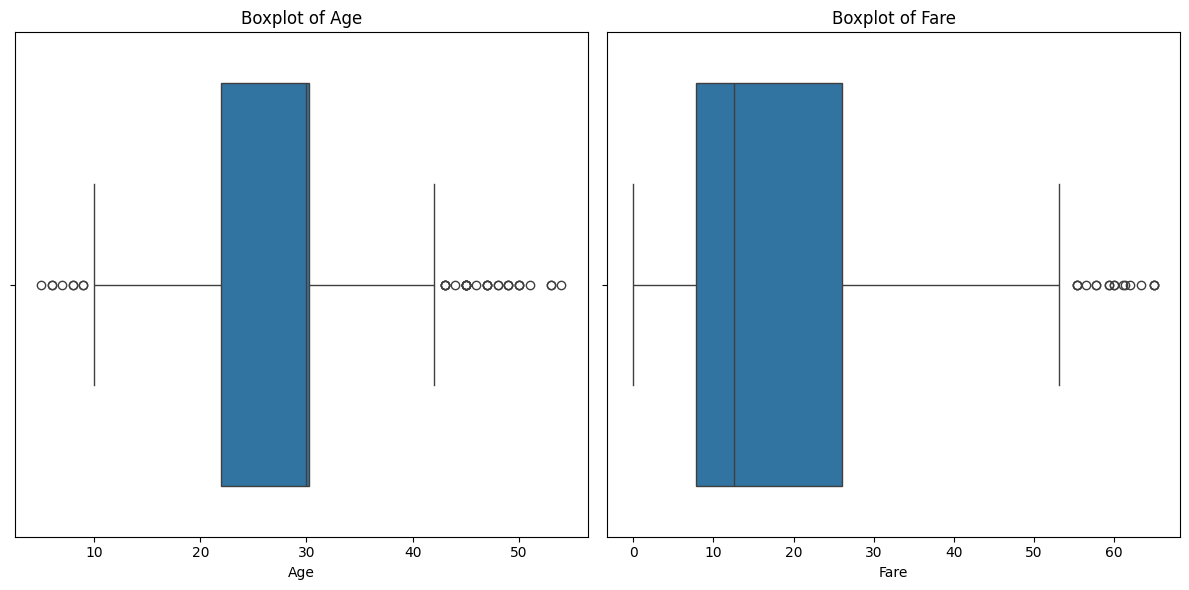

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots to visually check for outliers in 'Age' and 'Fare'
plt.figure(figsize=(12, 6))

# Age Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_no_outliers['Age'])
plt.title('Boxplot of Age')

# Fare Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()


In [74]:
# Drop columns that are not needed for prediction
df_no_outliers.drop(columns=['Name', 'Ticket', 'Cabin','SibSp', 'Parch'], inplace=True)

C:\Users\Rohith\AppData\Local\Temp\ipykernel_4676\4029650563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(columns=['Name', 'Ticket', 'Cabin','SibSp', 'Parch'], inplace=True)


In [75]:
# Convert 'Sex' to binary (0 for male, 1 for female)
df_no_outliers['Sex'] = df_no_outliers['Sex'].map({'male': 0, 'female': 1})
# One-hot encode 'Embarked'
df_no_outliers = pd.get_dummies(df_no_outliers, columns=['Embarked'], drop_first=True)

C:\Users\Rohith\AppData\Local\Temp\ipykernel_4676\3696037822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Sex'] = df_no_outliers['Sex'].map({'male': 0, 'female': 1})


In [76]:
# Features (X) and target (y)
X = df_no_outliers.drop(columns=['Survived'])
y = df_no_outliers['Survived']


In [77]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear', max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", report)


Accuracy:  1.0
Confusion Matrix: 
 [[43  0]
 [ 0 25]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        25

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [80]:
#Random Forest Classifer model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", report)


Accuracy:  1.0
Confusion Matrix: 
 [[43  0]
 [ 0 25]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        25

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

